In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from glob import glob

from sklearn.decomposition import TruncatedSVD, NMF
from utils import loadpkl, to_json

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [15]:
# load feathers
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm_notebook(files, mininterval=60)], axis=1)

# split train & test
train_df = df[df['click_mode'].notnull()]
test_df = df[df['click_mode'].isnull()]

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
# load pkls
df = loadpkl('../features/plans.pkl')
queries = loadpkl('../features/queries.pkl')
profiles = loadpkl('../features/profiles.pkl')
queries_pred = loadpkl('../features/queries_pred.pkl')

In [3]:
# merge
df = pd.merge(df, queries, on='sid', how='left')
df = pd.merge(df, profiles, on='pid', how='left')

del queries, profiles
gc.collect()

train_df = df[df['click_mode'].notnull()]

In [18]:
profiles = profiles[['pid']+['profile_{}'.format(i) for i in range(0,66)]]
df = pd.merge(queries, profiles, on='pid', how='left')

In [21]:
df.drop(['pid','req_time'],axis=1,inplace=True)

In [5]:
df.columns.to_list()

['sid',
 'plan_0_distance',
 'plan_1_distance',
 'plan_2_distance',
 'plan_3_distance',
 'plan_4_distance',
 'plan_5_distance',
 'plan_6_distance',
 'plan_0_price',
 'plan_1_price',
 'plan_2_price',
 'plan_3_price',
 'plan_4_price',
 'plan_5_price',
 'plan_6_price',
 'plan_0_eta',
 'plan_1_eta',
 'plan_2_eta',
 'plan_3_eta',
 'plan_4_eta',
 'plan_5_eta',
 'plan_6_eta',
 'plan_0_transport_mode',
 'plan_1_transport_mode',
 'plan_2_transport_mode',
 'plan_3_transport_mode',
 'plan_4_transport_mode',
 'plan_5_transport_mode',
 'plan_6_transport_mode',
 'plan_time',
 'click_mode',
 'plan_weekday',
 'plan_hour',
 'plan_weekday_hour',
 'plan_time_diff',
 'plan_weekday_count',
 'plan_hour_count',
 'plan_weekday_hour_count',
 'plan_distance_mean',
 'plan_distance_sum',
 'plan_distance_max',
 'plan_distance_min',
 'plan_distance_var',
 'plan_distance_skew',
 'plan_price_mean',
 'plan_price_sum',
 'plan_price_max',
 'plan_price_min',
 'plan_price_var',
 'plan_price_skew',
 'plan_eta_mean',
 'plan

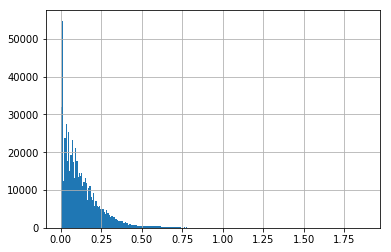

In [9]:
queries.queries_distance.hist(bins=255)

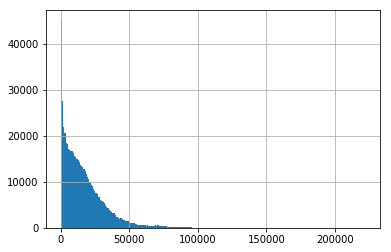

In [11]:
df.plan_1_distance.hist(bins=255)

In [12]:
for i, t in enumerate(['a','b','c']):
    print(i,t)

0 a
1 b
2 c


In [13]:
queries

,sid,pid,req_time,click_mode,x_o,y_o,x_d,y_d,queries_o_count,queries_d_count,queries_x_o_count,queries_y_o_count,queries_x_d_count,queries_y_d_count,queries_distance,queries_o_d_count,queries_weekday,queries_hour,queries_weekday_count,queries_hour_count
0,3000821,NaN,2018-11-02 17:54:30,9.0,116.29,39.97,116.32,39.96,1101,1046,15792,20412,37054,16937,0.031623,4,4,17,91118,43259
1,3085857,210736.0,2018-11-16 10:53:10,1.0,116.39,39.84,116.33,39.79,695,185,33319,12712,20339,4843,0.078102,1,4,10,91118,39921
2,2944522,NaN,2018-10-06 10:33:58,9.0,116.31,39.93,116.27,40.00,635,4633,27853,33989,14120,23584,0.080623,5,5,10,100748,39921
3,559931,202427.0,2018-11-23 14:54:11,1.0,116.27,39.88,116.39,39.90,363,8756,11881,15663,44759,46675,0.121655,9,4,14,91118,41918
4,2819352,172251.0,2018-10-30 11:48:41,7.0,116.34,39.96,116.37,39.86,1166,15545,18655,17994,35540,25996,0.104403,44,1,11,66301,40480
5,2754575,135606.0,2018-10-18 07:37:32,1.0,116.54,39.73,116.48,39.76,55,75,3515,2952,9440,4313,0.067082,1,3,7,82811,23773
6,2224795,189023.0,2018-11-20 14:34:03,1.0,116.34,39.73,116.79,40.35,312,12,18655,2952,159,4582,0.766094,1,1,14,66301,41918
7,1598541,156954.0,2018-10-03 09:19:47,1.0,116.26,40.22,116.24,40.22,350,745,5885,3308,3959,3294,0.020000,34,2,9,91688,39881
8,676316,135045.0,2018-11-15 15:25:52,5.0,116.39,39.91,116.39,39.90,3473,8756,33319,61527,44759,46675,0.010000,174,3,15,82811,42178
9,1068802,176605.0,2018-11-08 23:13:57,3.0,116.29,40.02,116.27,39.95,114,513,15792,4817,14120,18884,0.072801,1,3,23,82811,9343
